In [1]:
import tensorflow as tf
from keras_preprocessing.image import ImageDataGenerator

In [2]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)
training_set = train_datagen.flow_from_directory('C:/Users/ADMIN/OneDrive/Desktop/C&B/Training',
                                                 target_size = (64, 64),
                                                 batch_size = 16,
                                                 class_mode = 'binary')

Found 160 images belonging to 2 classes.


In [3]:
test_datagen = ImageDataGenerator(rescale = 1./255)
test_set = test_datagen.flow_from_directory('C:/Users/ADMIN/OneDrive/Desktop/C&B/Testing',
                                            target_size = (64, 64),
                                            batch_size = 16,
                                            class_mode = 'binary')

Found 40 images belonging to 2 classes.


In [4]:
cnn = tf.keras.models.Sequential()

In [5]:
cnn.add(tf.keras.layers.Conv2D(filters=16, kernel_size=3, activation='relu', input_shape=[64, 64, 3]))

In [6]:
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

In [7]:
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

In [8]:
# Adding a third convolutional layer
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

In [9]:
cnn.add(tf.keras.layers.Flatten())

In [10]:
cnn.add(tf.keras.layers.Dense(units=50, activation='relu'))

In [11]:
cnn.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

In [12]:
cnn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 16)        448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 31, 31, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 29, 29, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 12, 12, 32)        9248      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 6, 6, 32)         0

In [13]:
cnn.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [14]:
history_model=cnn.fit(x = training_set, validation_data = test_set, epochs = 20)

Epoch 1/20
10/10 [==============================] - 1s 65ms/step - loss: 0.6972 - accuracy: 0.5500 - val_loss: 0.6888 - val_accuracy: 0.5000
Epoch 2/20
10/10 [==============================] - 1s 54ms/step - loss: 0.6735 - accuracy: 0.5625 - val_loss: 0.6600 - val_accuracy: 0.7250
Epoch 3/20
10/10 [==============================] - 1s 54ms/step - loss: 0.6152 - accuracy: 0.7563 - val_loss: 0.5941 - val_accuracy: 0.7500
Epoch 4/20
10/10 [==============================] - 1s 57ms/step - loss: 0.5118 - accuracy: 0.7937 - val_loss: 0.4965 - val_accuracy: 0.8000
Epoch 5/20
10/10 [==============================] - 1s 54ms/step - loss: 0.4576 - accuracy: 0.7437 - val_loss: 0.4915 - val_accuracy: 0.7250
Epoch 6/20
10/10 [==============================] - 1s 52ms/step - loss: 0.4406 - accuracy: 0.8000 - val_loss: 0.4404 - val_accuracy: 0.8000
Epoch 7/20
10/10 [==============================] - 1s 56ms/step - loss: 0.3755 - accuracy: 0.8375 - val_loss: 0.4503 - val_accuracy: 0.9250
Epoch 8/20
10

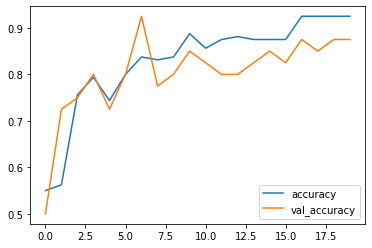

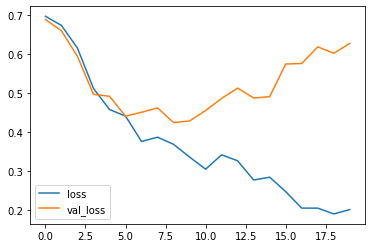

In [15]:
# Accuracy comparison
import matplotlib.pyplot as plt

plt.plot(history_model.history['accuracy'])
plt.plot(history_model.history['val_accuracy'])
plt.legend(['accuracy','val_accuracy'])
plt.show()


# Loss Comparison
plt.plot(history_model.history['loss'])
plt.plot(history_model.history['val_loss'])
plt.legend(['loss','val_loss'])
plt.show()

In [21]:
import numpy as np
from keras_preprocessing import image
test_image = image.load_img('C:/Users/ADMIN/OneDrive/Desktop/C&B/Training/Cars/images (102).jpg', target_size = (64, 64))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = cnn.predict(test_image)
training_set.class_indices
if result[0][0] == 1:
  prediction = 'car'
else:
  prediction = 'bike'

In [22]:
print(prediction)

car
